In [1]:
#importing libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [28]:
#reading data
data = pd.read_csv('headbrain.csv')
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


# Linear Regression from Scratch

In [59]:
#
independent_X = data['Head Size(cm^3)'].values
dependent_Y = data['Brain Weight(grams)'].values

In [32]:
mean_X = np.mean(independent_X)
mean_Y = np.mean(dependent_Y)

numberOfData = len(independent_X)

numerator = 0
denominator = 0

for i in range(numberOfData):
    numerator += (independent_X[i]-mean_X)*(dependent_Y[i]-mean_Y)
    denominator += (independent_X[i]-mean_X)**2

slope = numerator/denominator
con = mean_Y - (slope*mean_X)

print(slope, con)

0.26342933948939945 325.57342104944223


In [33]:
#Plotting

max_X = np.max(independent_X) + 100
min_X = np.min(independent_X) - 100

x = np.linspace(min_X, max_X, 1000)
y = slope*x + con

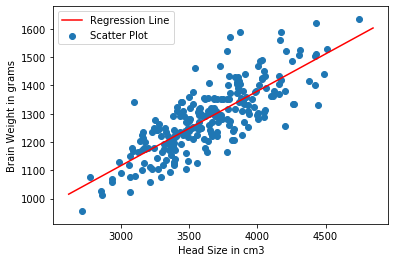

In [34]:
plt.plot(x,y, color ='red', label = 'Regression Line')
plt.scatter(independent_X, dependent_Y, label = 'Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()

plt.show()

In [35]:
#calculation of accuracy

distance_Actual = 0
distance_Predicted = 0

for i in range(numberOfData):
    y_Predicted = (slope*independent_X[i]) + con
    distance_Actual += (dependent_Y[i] - mean_Y)**2
    distance_Predicted += (dependent_Y[i] - y_Predicted)**2
    
r2 = 1 - (distance_Predicted/distance_Actual)

print(r2)


0.6393117199570003


# Linear Regression using scikit-learn

In [36]:
#importing the required scikit-learn libraries

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [58]:
independent_X_lr = independent_X.reshape((numberOfData, 1))

In [49]:
regressionModel = LinearRegression()

In [50]:
regressionModel.fit(independent_X, dependent_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
Y_pred = regressionModel.predict(independent_X)

In [52]:
r2_sk = regressionModel.score(independent_X, dependent_Y)

print(r2_sk)

0.639311719957
